# gwsurrogate demo
Description: Python package for evaluating numerical relativity surrogate waveform models.   
Webpage: https://github.com/sxs-collaboration/gwsurrogate    

Notebook author: Vijay Varma, 2020. (Contact: vijay.varma392@gmail.com, [vijayvarma.com](https://vijayvarma.com/))

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
import surfinBH
import warnings
warnings.filterwarnings("ignore")     # This is just for the demo, you may want to remove this

import gwsurrogate

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


## Installation
#### PyPi
`pip install gwsurrogate`
#### Conda
`conda install -c conda-forge gwsurrogate`
#### Source
follow instructions in
`https://github.com/sxs-collaboration/gwsurrogate#from-source`

## Available models

In [2]:
# NOTE: Only NRSur7dq4, NRHybSur3dq8 and NRHybSur3dq8Tidal are available through the following interface.
# We plan to move the other models to the same interface soon.
gwsurrogate.catalog.list()

EOBNRv2
SpEC_q1_10_NoSpin
SpEC_q1_10_NoSpin_linear
SpEC_q1_10_NoSpin_linear_alt
NRSur4d2s_TDROM_grid12
NRSur4d2s_FDROM_grid12
NRHybSur3dq8
NRSur7dq4
NRHybSur3dq8Tidal
EMRISur1dq1e4


In [3]:
# more details in https://github.com/sxs-collaboration/gwsurrogate/blob/master/tutorial/website/NRSur7dq4.ipynb
model = 'NRSur7dq4'
print(gwsurrogate.catalog._surrogate_world[model].desc)
print(gwsurrogate.catalog._surrogate_world[model].refs)

Surrogate model for precessing binary black holes with mass ratios q<=4
  and spin magnitudes <=0.8. This model is presented in Varma et al. 2019,
  arxiv:1905.09300. All ell<=4 modes are included. The spin and frame dynamics
  are also modeled.
https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.1.033015


In [4]:
# more details in https://github.com/sxs-collaboration/gwsurrogate/blob/master/tutorial/website/NRHybSur3dq8.ipynb
model = 'NRHybSur3dq8'
print(gwsurrogate.catalog._surrogate_world[model].desc)
print(gwsurrogate.catalog._surrogate_world[model].refs)

Surrogate model for aligned-spin binary black holes with mass ratios q<=8
  and spin magnitudes <=0.8. The model is trained on NR waveforms that have been
  hybridized using EOB/PN and spans the entire LIGO frequency band. This model
  is  presented in Varma et al. 2018, arxiv:1812.07865. Available modes are
  [(2,2), (2,1), (2,0), (3,3), (3,2), (3,1), (3,0), (4,4), (4,3), (4,2) and
  (5,5)]. The m<0 modes are deduced from the m>0 modes.
https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.064045


In [5]:
# more details in https://github.com/sxs-collaboration/gwsurrogate/blob/master/tutorial/website/NRHybSur3dq8Tidal.ipynb
model = 'NRHybSur3dq8Tidal'
print(gwsurrogate.catalog._surrogate_world[model].desc)
print(gwsurrogate.catalog._surrogate_world[model].refs)

Surrogate model 'NRHybSur3dq8' modified by splicing in PN tidal
  approximants for aligned-spin binary neutron stars/black hole-neutron star
  systems with mass ratio q<=8 and spin magnitudes <=.7; please see the 
  NRHybSur3dq8Tidal class doctring for why these restrictions are smaller
  than the NRHybSur3dq8 model. The model is spliced using the
  TaylorT2 expansion and spans the entire LIGO frequency band. This
  model is presented in Barkett et al. 2019, arxiv:xxxx.xxxxx #FIXME. Available
  modes are [(2,2), (2,1), (2,0), (3,3), (3,2), (3,1), (3,0), (4,4), (4,3),
  (4,2) and (5,5)]. The m<0 modes are deduced from the m>0 modes. The same
  hdf5 file is used for both NRHybSur3dq8Tidal and NRHybSur3dq8 models. 
https://arxiv.org/abs/1911.10440


In [6]:
# This model currently has a differnt interface than shown in this notebook, 
# instead check out https://github.com/BlackHolePerturbationToolkit/EMRISurrogate/blob/master/EMRISur1dq1e4.ipynb
model = 'EMRISur1dq1e4'
print(gwsurrogate.catalog._surrogate_world[model].desc)
print(gwsurrogate.catalog._surrogate_world[model].refs)

Surrogate model 'EMRISur1dq1e4' for non-spinning black hole binary
  systems with mass-ratios varying from 3 to 10000. This surrogate model
  is trained on waveform data generated by point-particle black hole
  perturbation theory (ppBHPT), with the total mass rescaling parameter tuned
  to NR simulations according to the paper's Eq. 4. Note that this rescaling
  is applied in EvaluateSingleModeSurrogate's call method, and to generate 
  point-particle perturbation theory waveforms set alpha_emri = 1.
  Available modes are [(2,2), (2,1), (3,3), (3,2), (3,1), (4,4), (4,3), 
  (4,2), (5,5), (5,4), (5,3)]. The m<0 modes are deduced from the m>0 modes.
  Model details can be found in Rifat et al. 2019, arXiv:1910.10473.
https://arxiv.org/abs/1910.10473


## Load your favorite model (this only needs to be done once at the start of a script)

In [7]:
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


## Read the documentation

In [8]:
help(sur)

Help on NRSur7dq4 in module gwsurrogate.surrogate object:

class NRSur7dq4(SurrogateEvaluator)
 |  NRSur7dq4(h5filename)
 |  
 |  A class for the NRSur7dq4 surrogate model presented in Varma et al. 2019,
 |  arxiv1905.09300.
 |  
 |  Evaluates gravitational waveforms generated by precessing binary black hole
 |  systems with generic mass ratios and spins.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  2<=ell<=4, -ell<=m<=ell.
 |  
 |  The parameter space of validity is:
 |  q \in [1, 6], and |chi1|,|chi2| \in [-1, 1], with generic directions.
 |  where q is the mass ratio and chi1/chi2 are the spin vectors of the
 |  heavier/lighter BH, respectively.
 |  
 |  The surrogate has been trained in the range
 |  q \in [1, 4] and |chi1|/|chi2| \in [-0.8, 0.8], but produces reasonable
 |  waveforms in the above range and has been tested against existing
 |  NR waveforms in that range.
 |  
 |  See the __call__ method on how to evaluate waveforms.
 |  In 

## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

In [9]:
q = 4                            # q = m1/m2 >= 1
chiA = [-0.2, 0.4, 0.1]          # dimensionless spin of the heavier BH 
chiB = [-0.5, 0.2, -0.4]         # dimensionless spin of the lighter BH
dt = 0.1                         # timestep size, Units of M
f_low = 0                        # initial frequency in units of 1/M, f_low=0 returns the full surrogate
f_ref = 0                        # reference frequecny (1/M). The spins are assumed to specified at this frequency
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref)   # dyn stands for dynamics, do dyn.keys() to see contents

In [10]:
# Let's see all available modes
print(sorted(h.keys()))

[(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3), (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


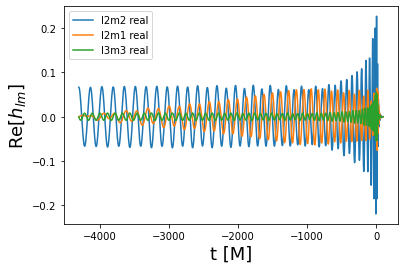

In [11]:
P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform modes in physical units

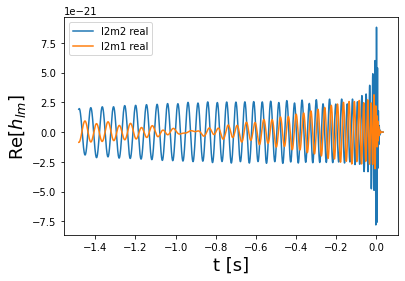

In [12]:
q = 4                            # q = m1/m2 >= 1
chiA = [-0.2, 0.4, 0.1]          # dimensionless spin of the heavier BH 
chiB = [-0.5, 0.2, -0.4]         # dimensionless spin of the lighter BH
f_ref = 20                       # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0                        # initial frequency, f_low=0 returns the full surrogate
M = 70                           # Total masss in solar masses
dist_mpc = 100                   # distance in megaparsecs
dt = 1./4096                     # step size in seconds
ellMax = 4                       # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on the sky

Text(0.5, 0, 't [s]')

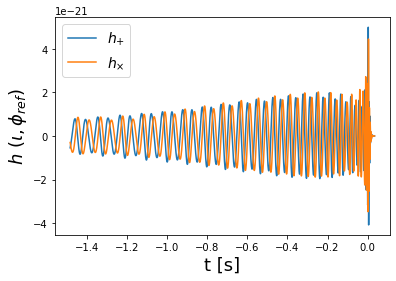

In [13]:
q = 4                            # q = m1/m2 >= 1
chiA = [-0.2, 0.4, 0.1]          # dimensionless spin of the heavier BH 
chiB = [-0.5, 0.2, -0.4]         # dimensionless spin of the lighter BH
f_ref = 20                       # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0                        # initial frequency, f_low=0 returns the full surrogate
M = 70                           # Total masss in solar masses
dist_mpc = 100                   # distance in megaparsecs
dt = 1./4096                     # step size in seconds
ellMax = 4                       # Highest ell index for modes to use
inclination = np.pi/4            # angle between the orbital angular momentum direction at f_ref and the line-of-sight
phi_ref = np.pi/5                # azimuthal angle on the sky of the source frame

# Will only include modes ell<=ellMax
# Returns h = h_+ -i h_x at (inclination, phi_ref) in the sky of the source frame
# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.plot(t, h.real, label='$h_{+}$')
P.plot(t, -h.imag, label='$h_{\\times}$')
P.ylabel('$h$ $(\iota, \phi_{ref})$', fontsize=18)
P.legend(fontsize=14)
P.xlabel('t [s]', fontsize=18)

## Dynamics Surrogate

In [14]:
q = 4                            # q = m1/m2 >= 1
chiA = [-0.2, 0.4, 0.1]          # dimensionless spin of the heavier BH 
chiB = [-0.5, 0.2, -0.4]         # dimensionless spin of the lighter BH
dt = 0.1                         # timestep size, Units of M
f_low = 0                        # initial frequency in units of 1/M, f_low=0 returns the full surrogate
f_ref = 0                        # reference frequecny (1/M). The spins are assumed to specified at this frequency
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, precessing_opts={'return_dynamics': True})

In [15]:
# See all available dynamics data
dyn.keys()

dict_keys(['chiA', 'chiB', 'q_copr', 'orbphase'])

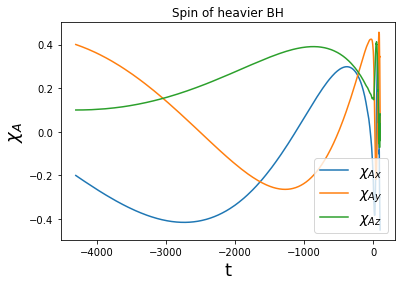

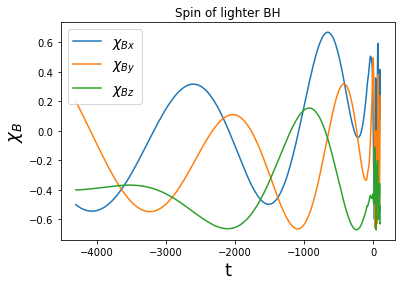

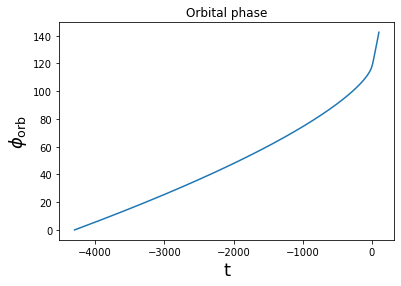

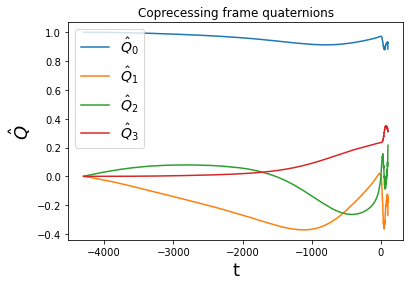

In [16]:
P.figure(1)
P.plot(t, dyn['chiA'][:,0], label='$\chi_{Ax}$')
P.plot(t, dyn['chiA'][:,1], label='$\chi_{Ay}$')
P.plot(t, dyn['chiA'][:,2], label='$\chi_{Az}$')
P.ylabel('$\chi_A$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of heavier BH')
P.legend(fontsize=14)

P.figure(2)
P.plot(t, dyn['chiB'][:,0], label='$\chi_{Bx}$')
P.plot(t, dyn['chiB'][:,1], label='$\chi_{By}$')
P.plot(t, dyn['chiB'][:,2], label='$\chi_{Bz}$')
P.ylabel('$\chi_B$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of lighter BH')
P.legend(fontsize=14)

P.figure(3)
P.plot(t, dyn['orbphase'][:,])
P.ylabel('$\phi_{\mathrm{orb}}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Orbital phase')

P.figure(4)
P.plot(t, dyn['q_copr'][0,:], label='$\hat{Q}_0$')
P.plot(t, dyn['q_copr'][1,:], label='$\hat{Q}_1$')
P.plot(t, dyn['q_copr'][2,:], label='$\hat{Q}_2$')
P.plot(t, dyn['q_copr'][3,:], label='$\hat{Q}_3$')
P.ylabel('$\hat{Q}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Coprecessing frame quaternions')
P.legend(fontsize=14)

## Exercise 1: How much did the orbital plane of GW190521 precess (with a lot of caveats)?

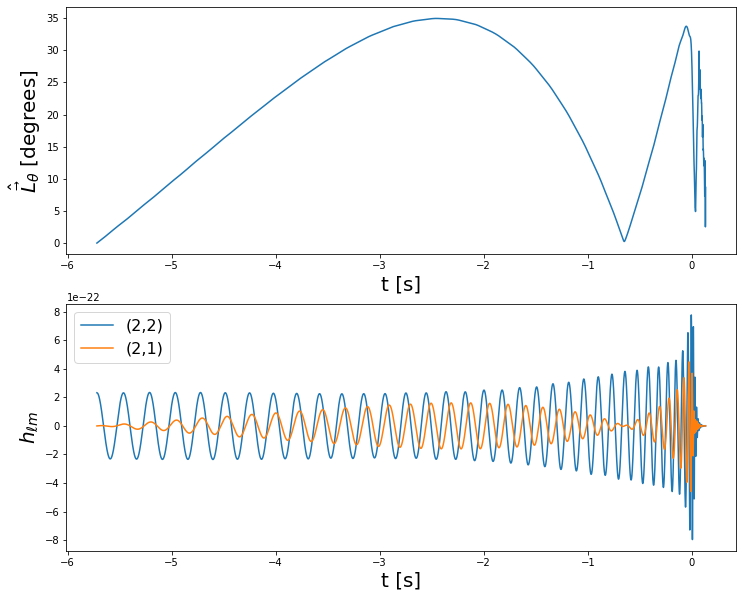

In [17]:
# NOTE: These parameters are only kind-of consistent with GW190521, not necessarily the "true" source parameters.
# In addition, this is also based on the assumption that the source was a noneccentric BBH merger.
# See https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.125.101102 for more details.
M = 270.                           # Detector frame total mass (MSun)
q = 1.26                           # Mass ratio
chiA = [0, 0.69, 0]                # Dimensionless spin of heavier BH
chiB = [0, 0.73, 0]                # Dimensionless spin of lighter BH
dist_mpc = 5300.                   # Luminosity distance (Mpc)
dt = 1./4096.                      # Time step (sec)
f_ref = 0                          # Reference frequency at which spins are defined (0 means at initial time)
f_low = 0                          # Start frequency (0 means use full surrogate)
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, M=M, \
    dist_mpc=dist_mpc, units='mks', precessing_opts={'return_dynamics': True})

# Orbital angular momentum direction
LHat = surfinBH._utils.lHat_from_quat(dyn['q_copr']).T
# Polar angle (theta) of Lhat in spherical coordinates
LTheta = np.arccos(LHat.T[2]/np.linalg.norm(LHat, axis=1))

fig, axarr = P.subplots(2,1,figsize=(12, 10))
P.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axarr[0]
ax.plot(t, LTheta*180/np.pi)
ax.set_ylabel('$\hat{\\vec{L}}_{\\theta}$ [degrees]', fontsize=20)
ax.set_xlabel('t [s]', fontsize=20)

ax = axarr[1]
ax.plot(t, h[(2,2)], label='(2,2)')
ax.plot(t, h[(2,1)], label='(2,1)')
ax.set_ylabel('$h_{\ell m}$', fontsize=20)
ax.set_xlabel('t [s]', fontsize=20)
ax.legend(loc='upper left', fontsize=16)     